In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_veh =pd.read_csv("vehicle.csv")
df_veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,Non_car
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,Non_car
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,Non_car
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,Non_car


In [4]:
df_veh.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
df_veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
# to know the percent of missing values
(df_veh.isnull().sum() /df_veh.index.size) *100 

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

**Drop the missing values**

In [7]:
df_veh.dropna(inplace=True)

In [8]:
cols = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
            'max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity',
            'scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about',
            'skewness_about.1','skewness_about.2','hollows_ratio']

In [9]:
cols=df_veh.drop('class',axis=1)

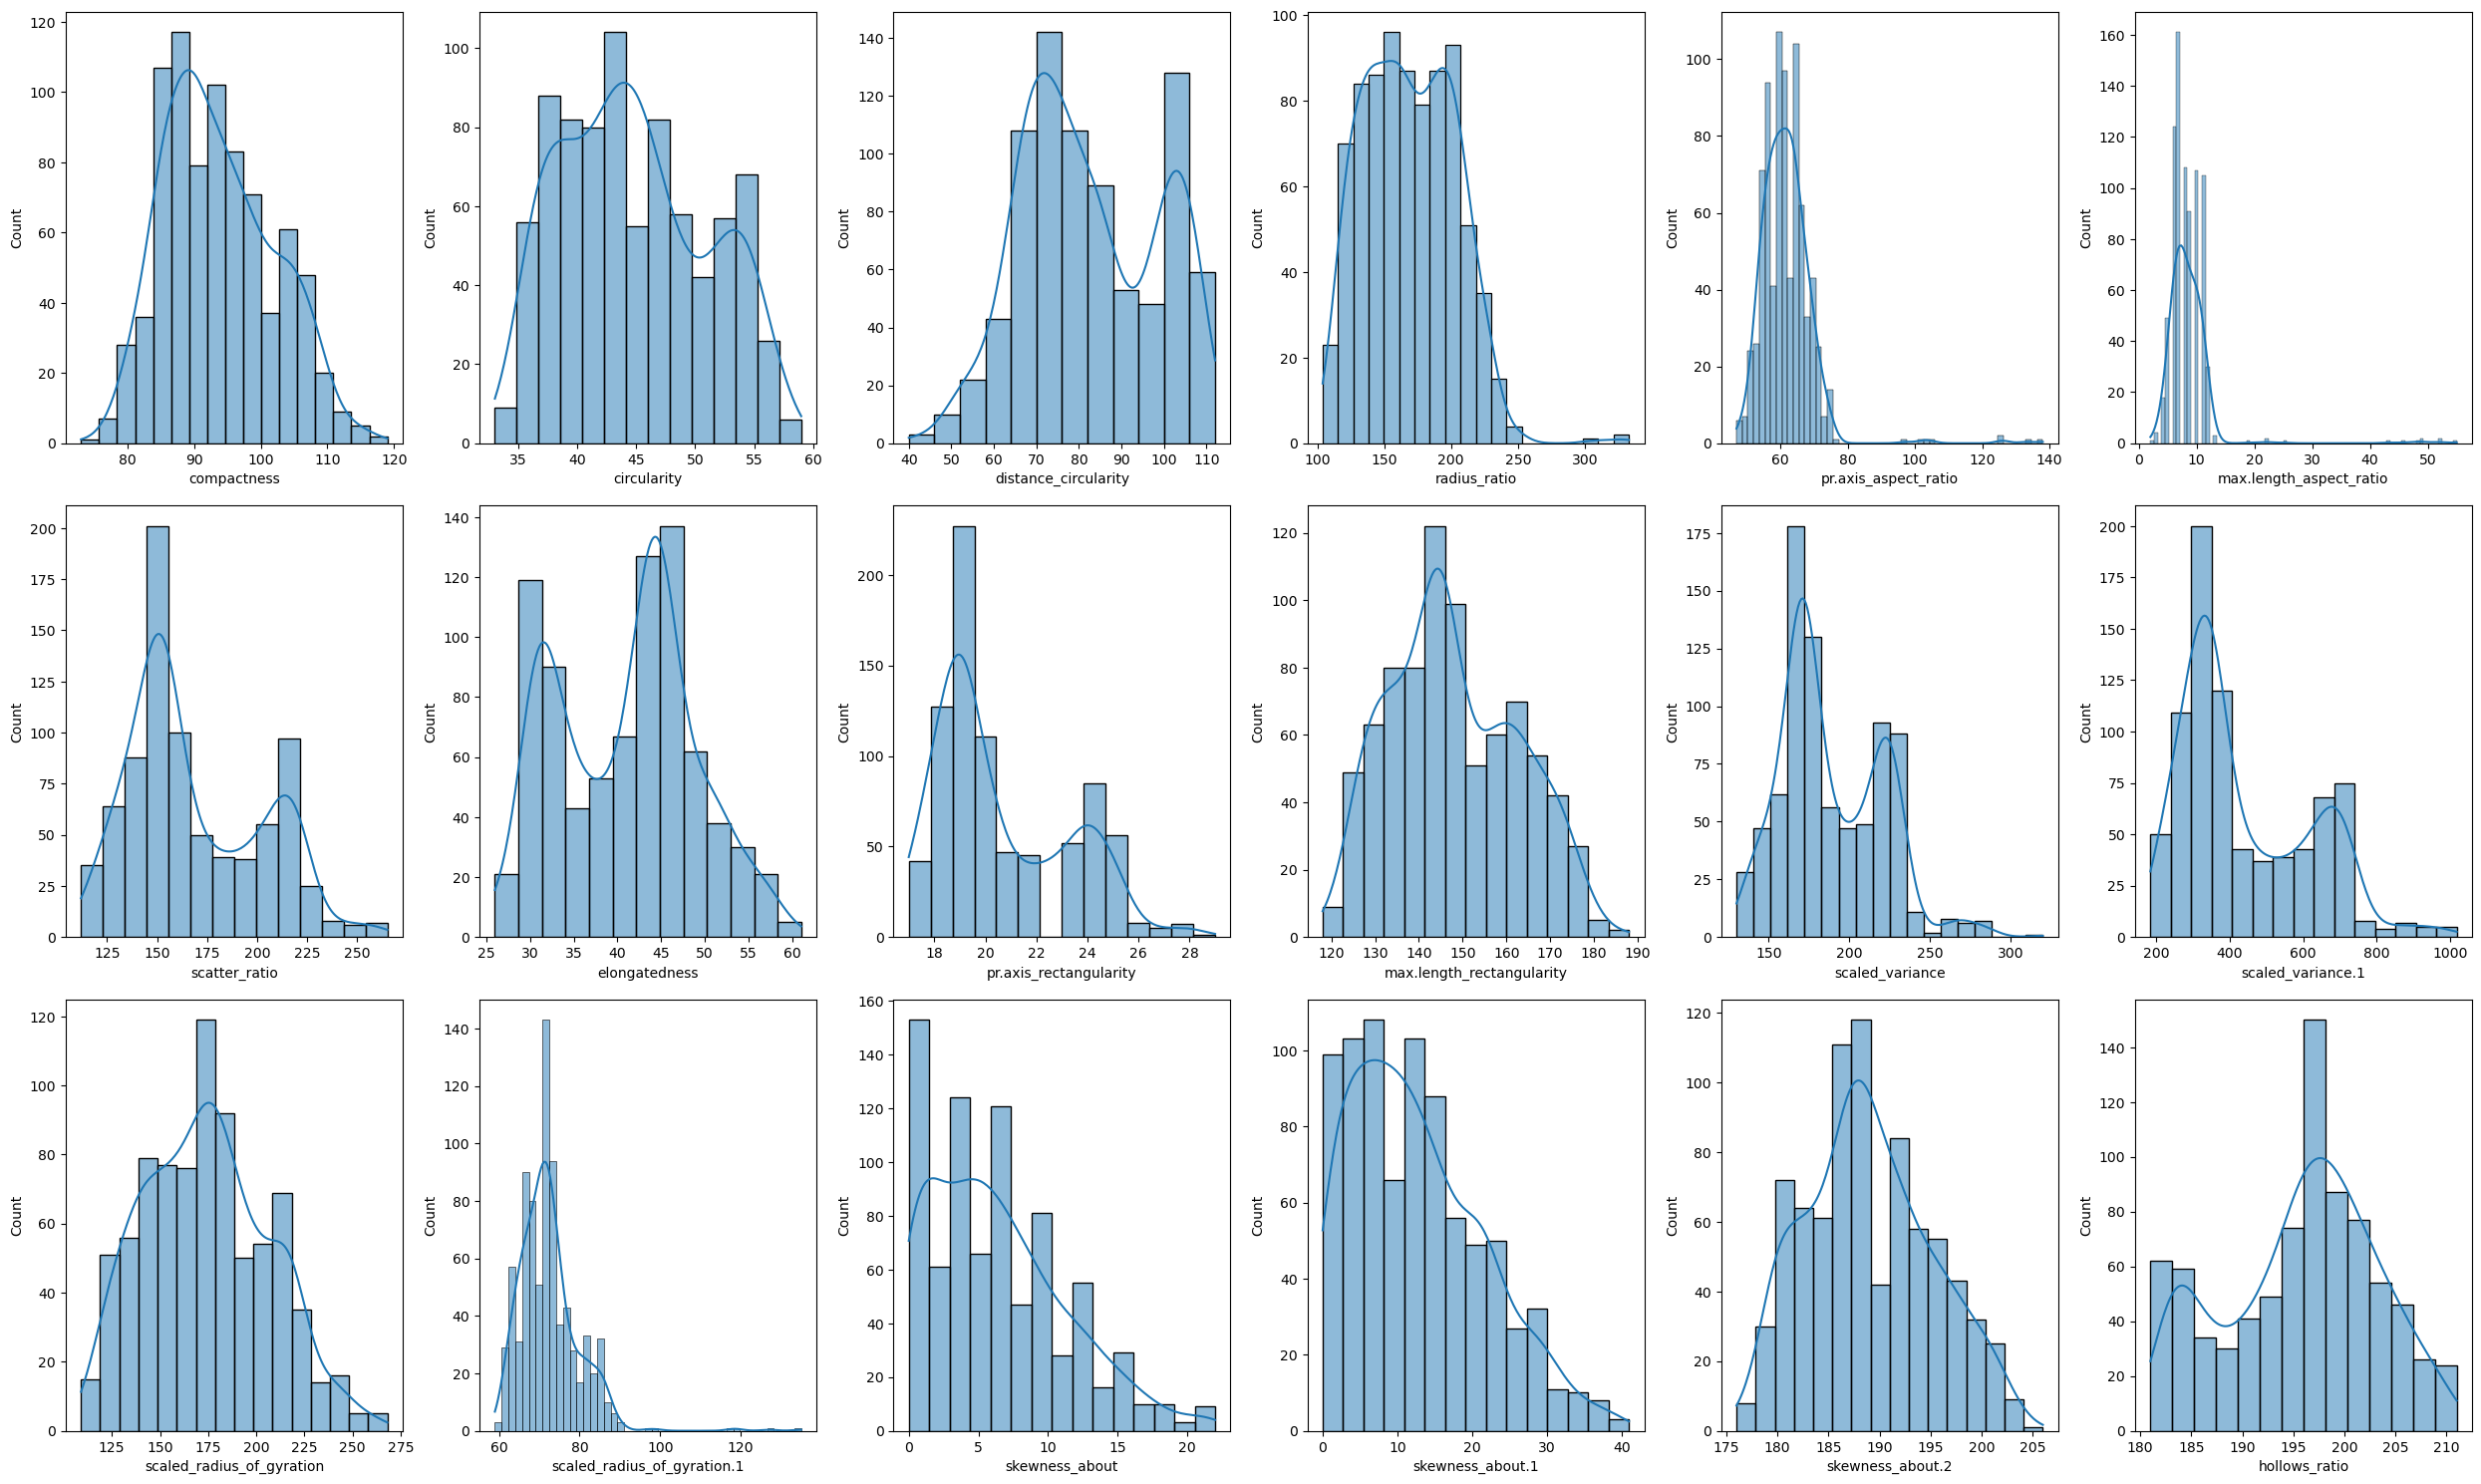

In [10]:
fig, ax= plt.subplots(3,6, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_veh[i], ax=subplot,kde=True)
    

plt.tight_layout()
plt.show()

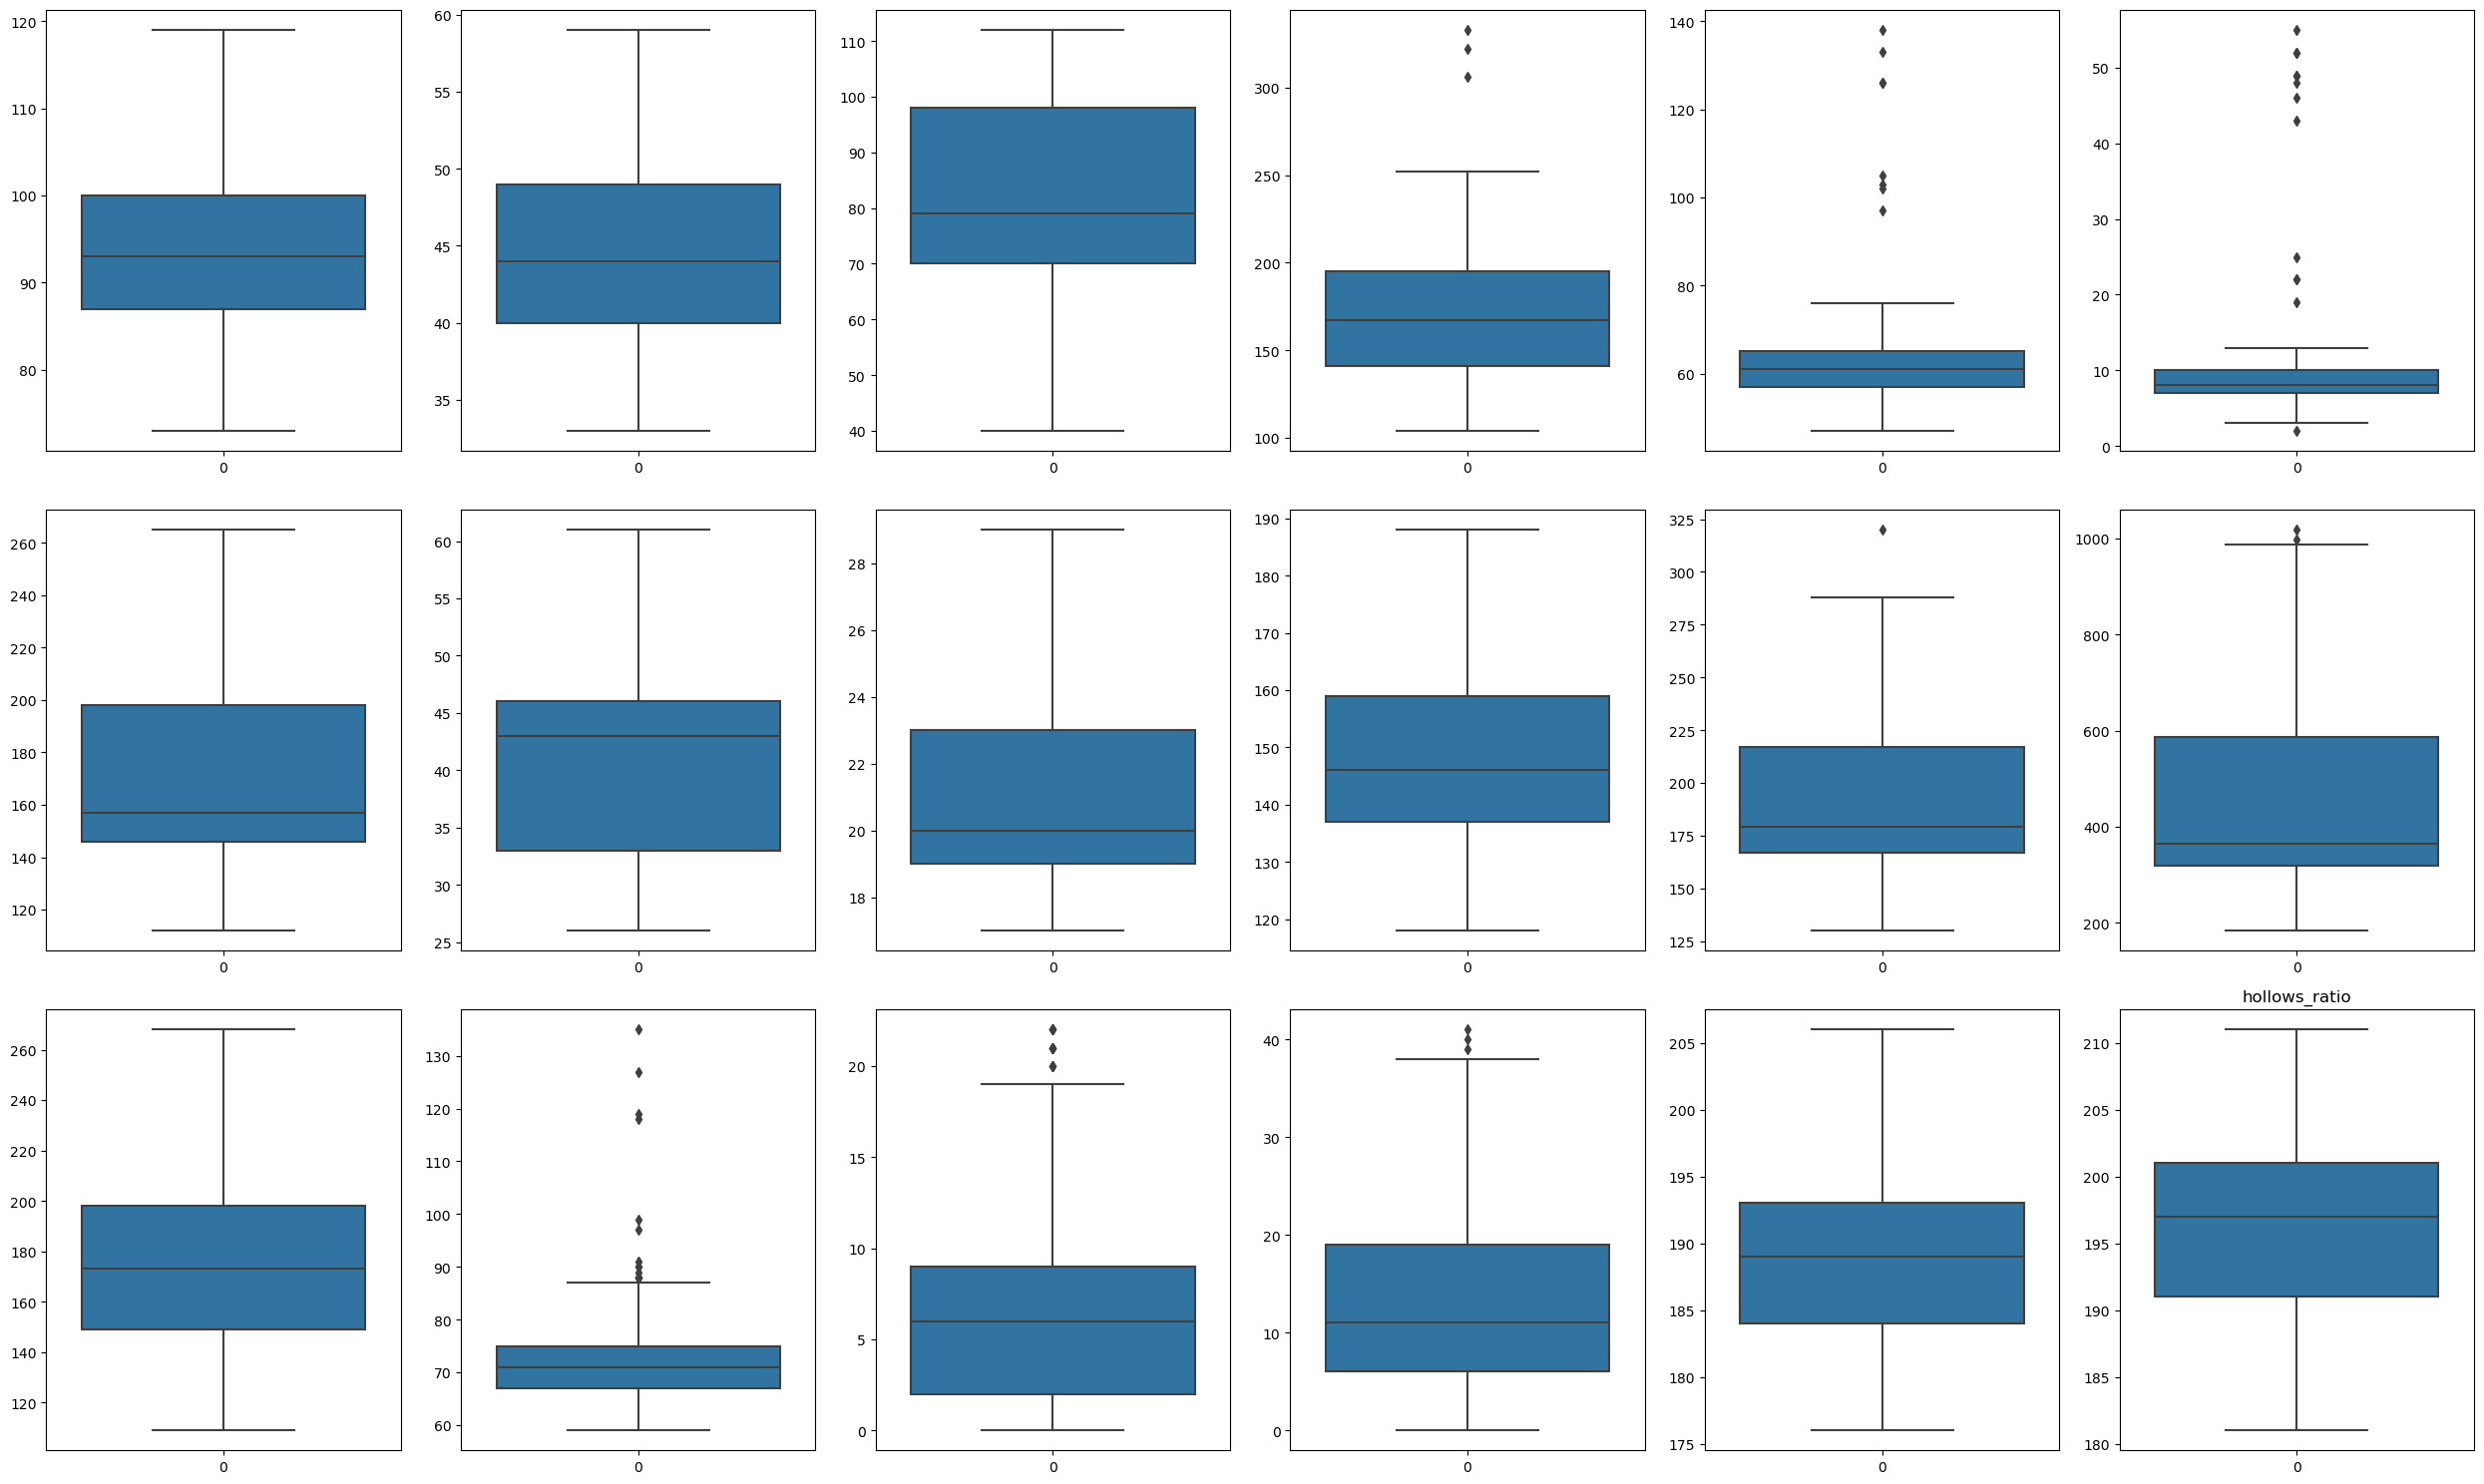

In [11]:
fig, ax= plt.subplots(3,6, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
  
    sns.boxplot(df_veh[i], ax=subplot)
    plt.title(i)
   
    

plt.tight_layout()
plt.show()

KeyError: 0

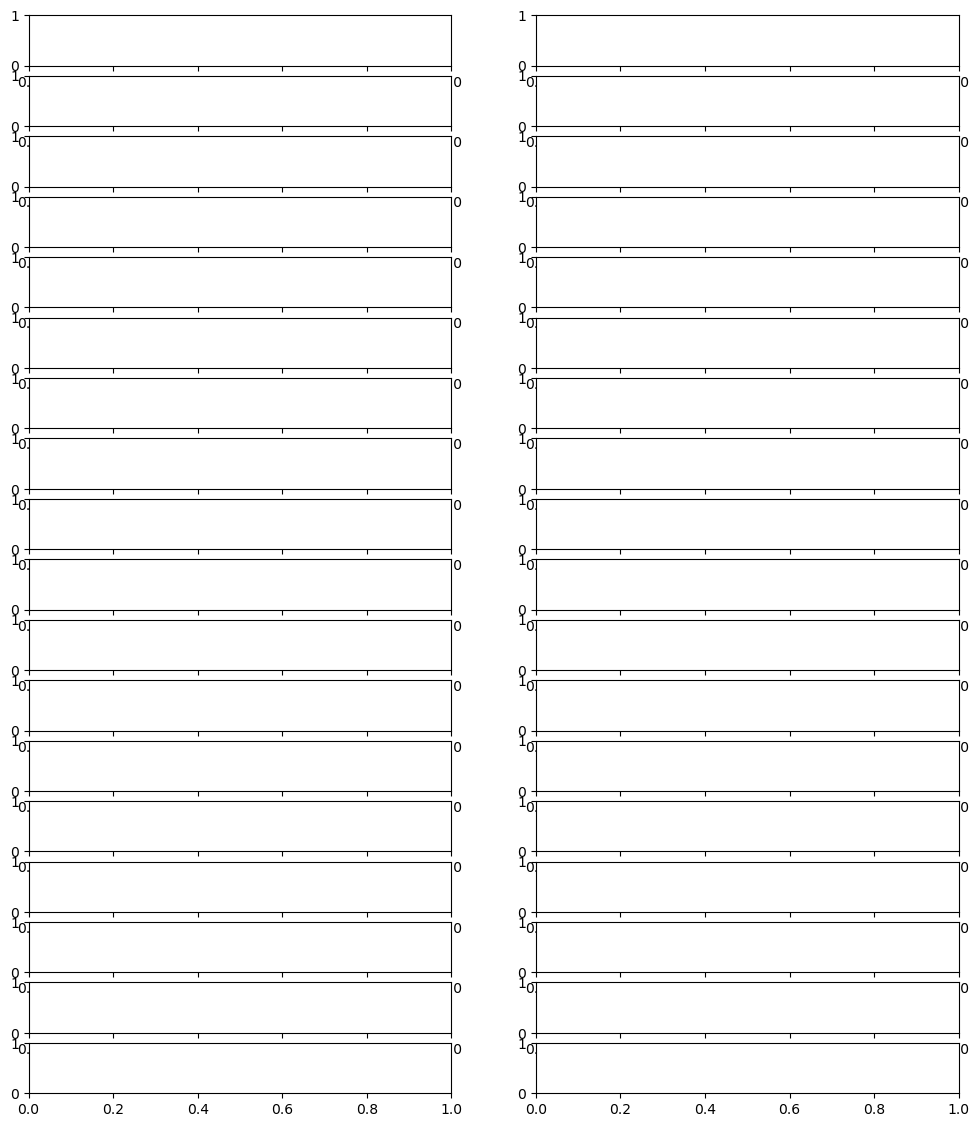

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=18,ncols=2)
fig.set_size_inches(12, 14)

for i in range(0,18):
    plt.figure(i)
    for j in range(0,1):
        sns.histplot(df_veh[cols[i]] , ax=axes[i][j]);
        sns.boxplot(df_veh[cols[i] ], orient = "v" , ax=axes[i][j+1]);
plt.show()

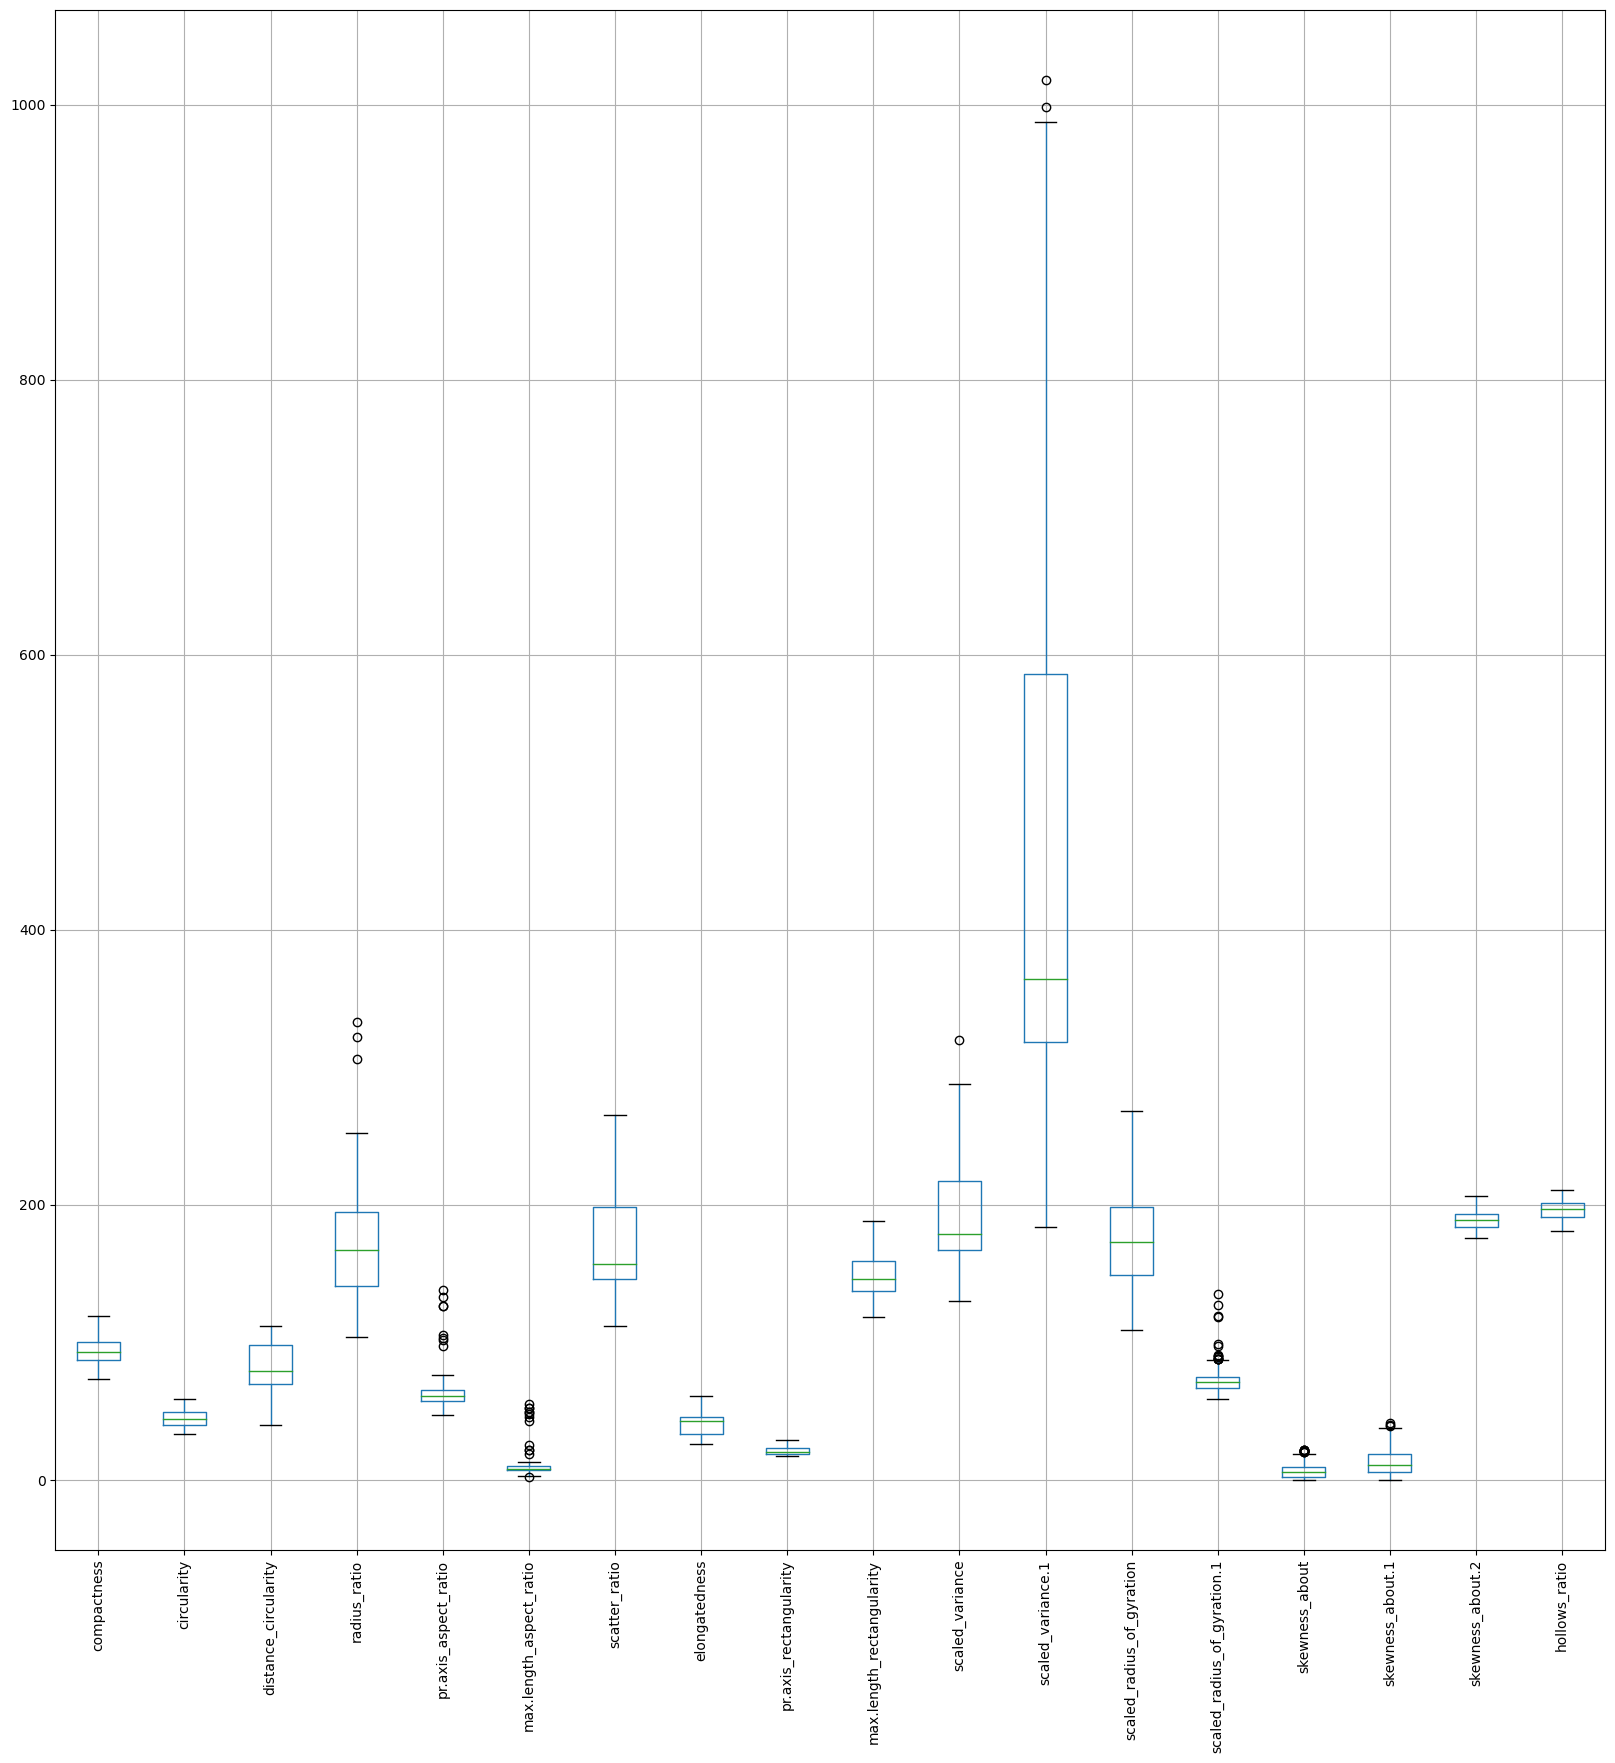

In [13]:
# There are outliers as seen below
# There are scaling issues too as some of the scales are too large
df_veh.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
df_veh.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [16]:
# prodcols = ['radius_ratio','pr.axis_aspect_ratio','scaled_variance',
#             'scaled_variance.1','scaled_radius_of_gyration','skewness_about','skewness_about.1'
#             ]
# for i in range(0,7):
#     ll,ul = remove_outlier(data[prodcols[i]])
#     # data[prodcols[i]]=np.where(data[prodcols[i]]>ul,ul,data[prodcols[i]])
#     # data[prodcols[i]]=np.where(data[prodcols[i]]<ll,ll,data[prodcols[i]])
#     print(ll,ul)
   

In [17]:

for i in cols:
    ll,ul = remove_outlier(df_veh[[i]])
    df_veh[i]=np.where(df_veh[i]>ul,ul,df_veh[i])
    df_veh[i]=np.where(df_veh[i]<ll,ll,df_veh[i])
    print(i)
    print(ll,ul)

compactness
67.5 119.5
circularity
26.5 62.5
distance_circularity
28.0 140.0
radius_ratio
60.0 276.0
pr.axis_aspect_ratio
45.0 77.0
max.length_aspect_ratio
2.5 14.5
scatter_ratio
68.0 276.0
elongatedness
13.5 65.5
pr.axis_rectangularity
13.0 29.0
max.length_rectangularity
104.0 192.0
scaled_variance
92.0 292.0
scaled_variance.1
-84.0 988.0
scaled_radius_of_gyration
75.5 271.5
scaled_radius_of_gyration.1
55.0 87.0
skewness_about
-8.5 19.5
skewness_about.1
-13.5 38.5
skewness_about.2
170.5 206.5
hollows_ratio
176.0 216.0


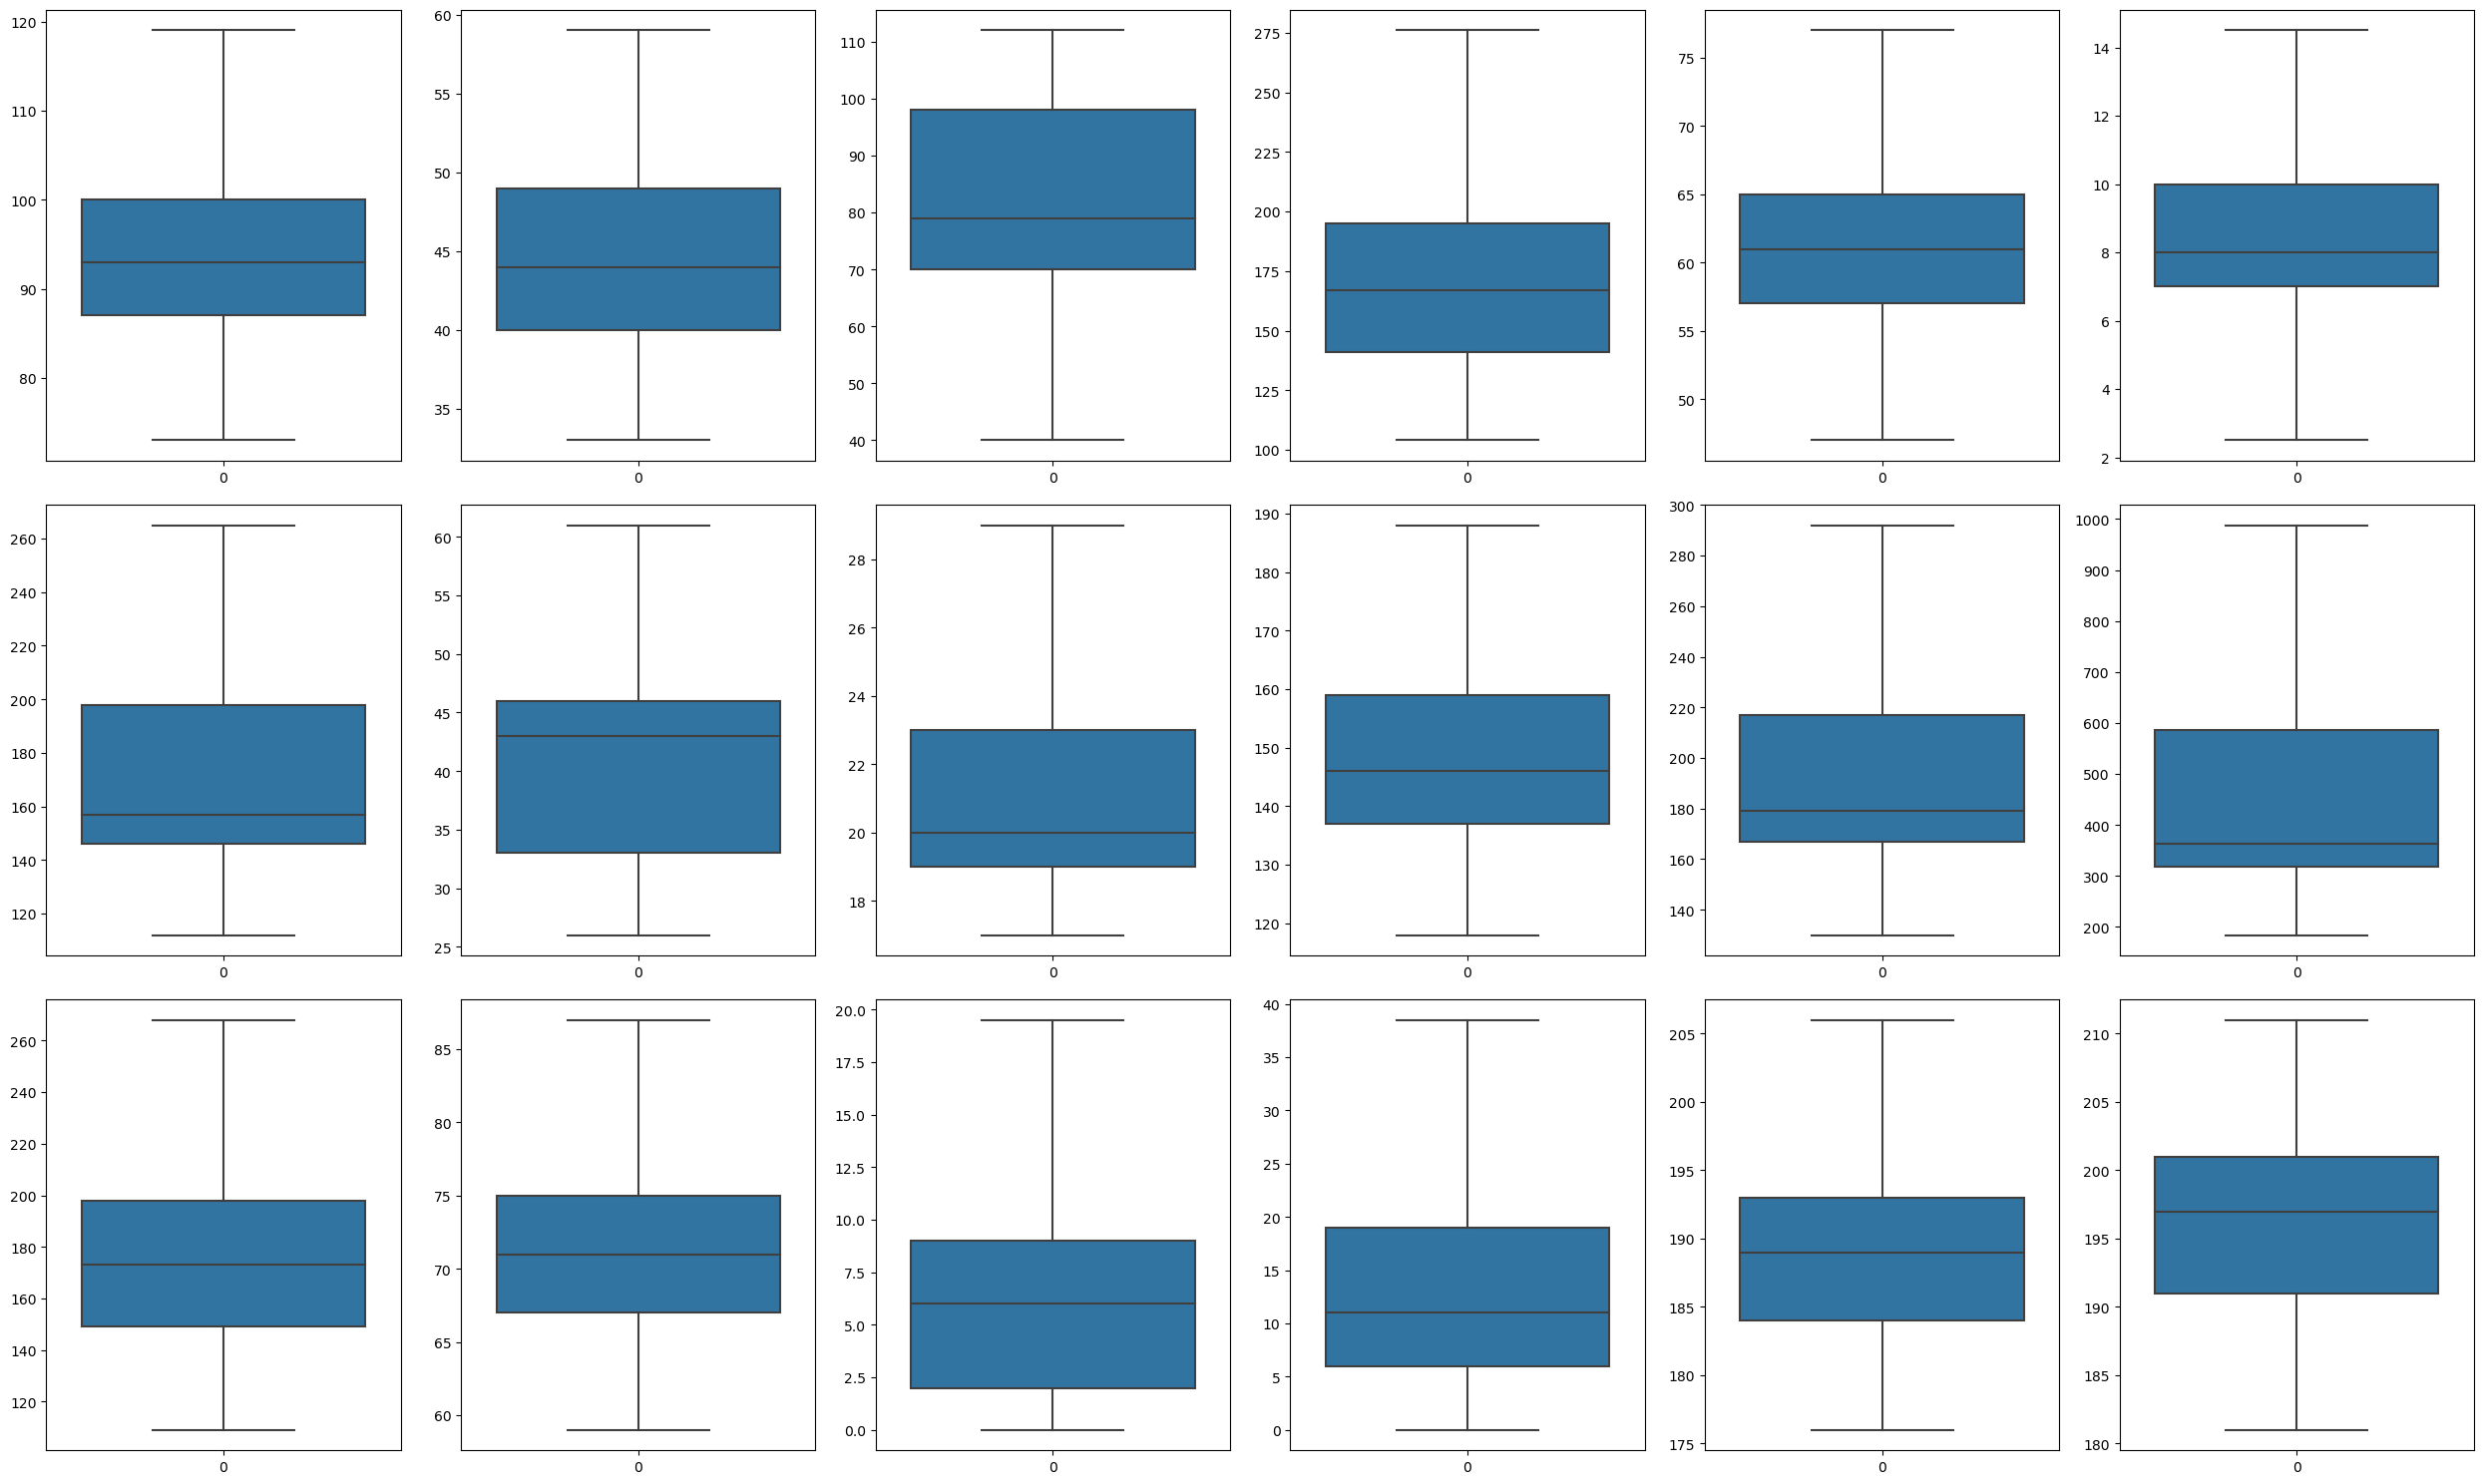

In [18]:
fig, ax= plt.subplots(3,6, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_veh[i], ax=subplot)
   
    

plt.tight_layout()
plt.show()

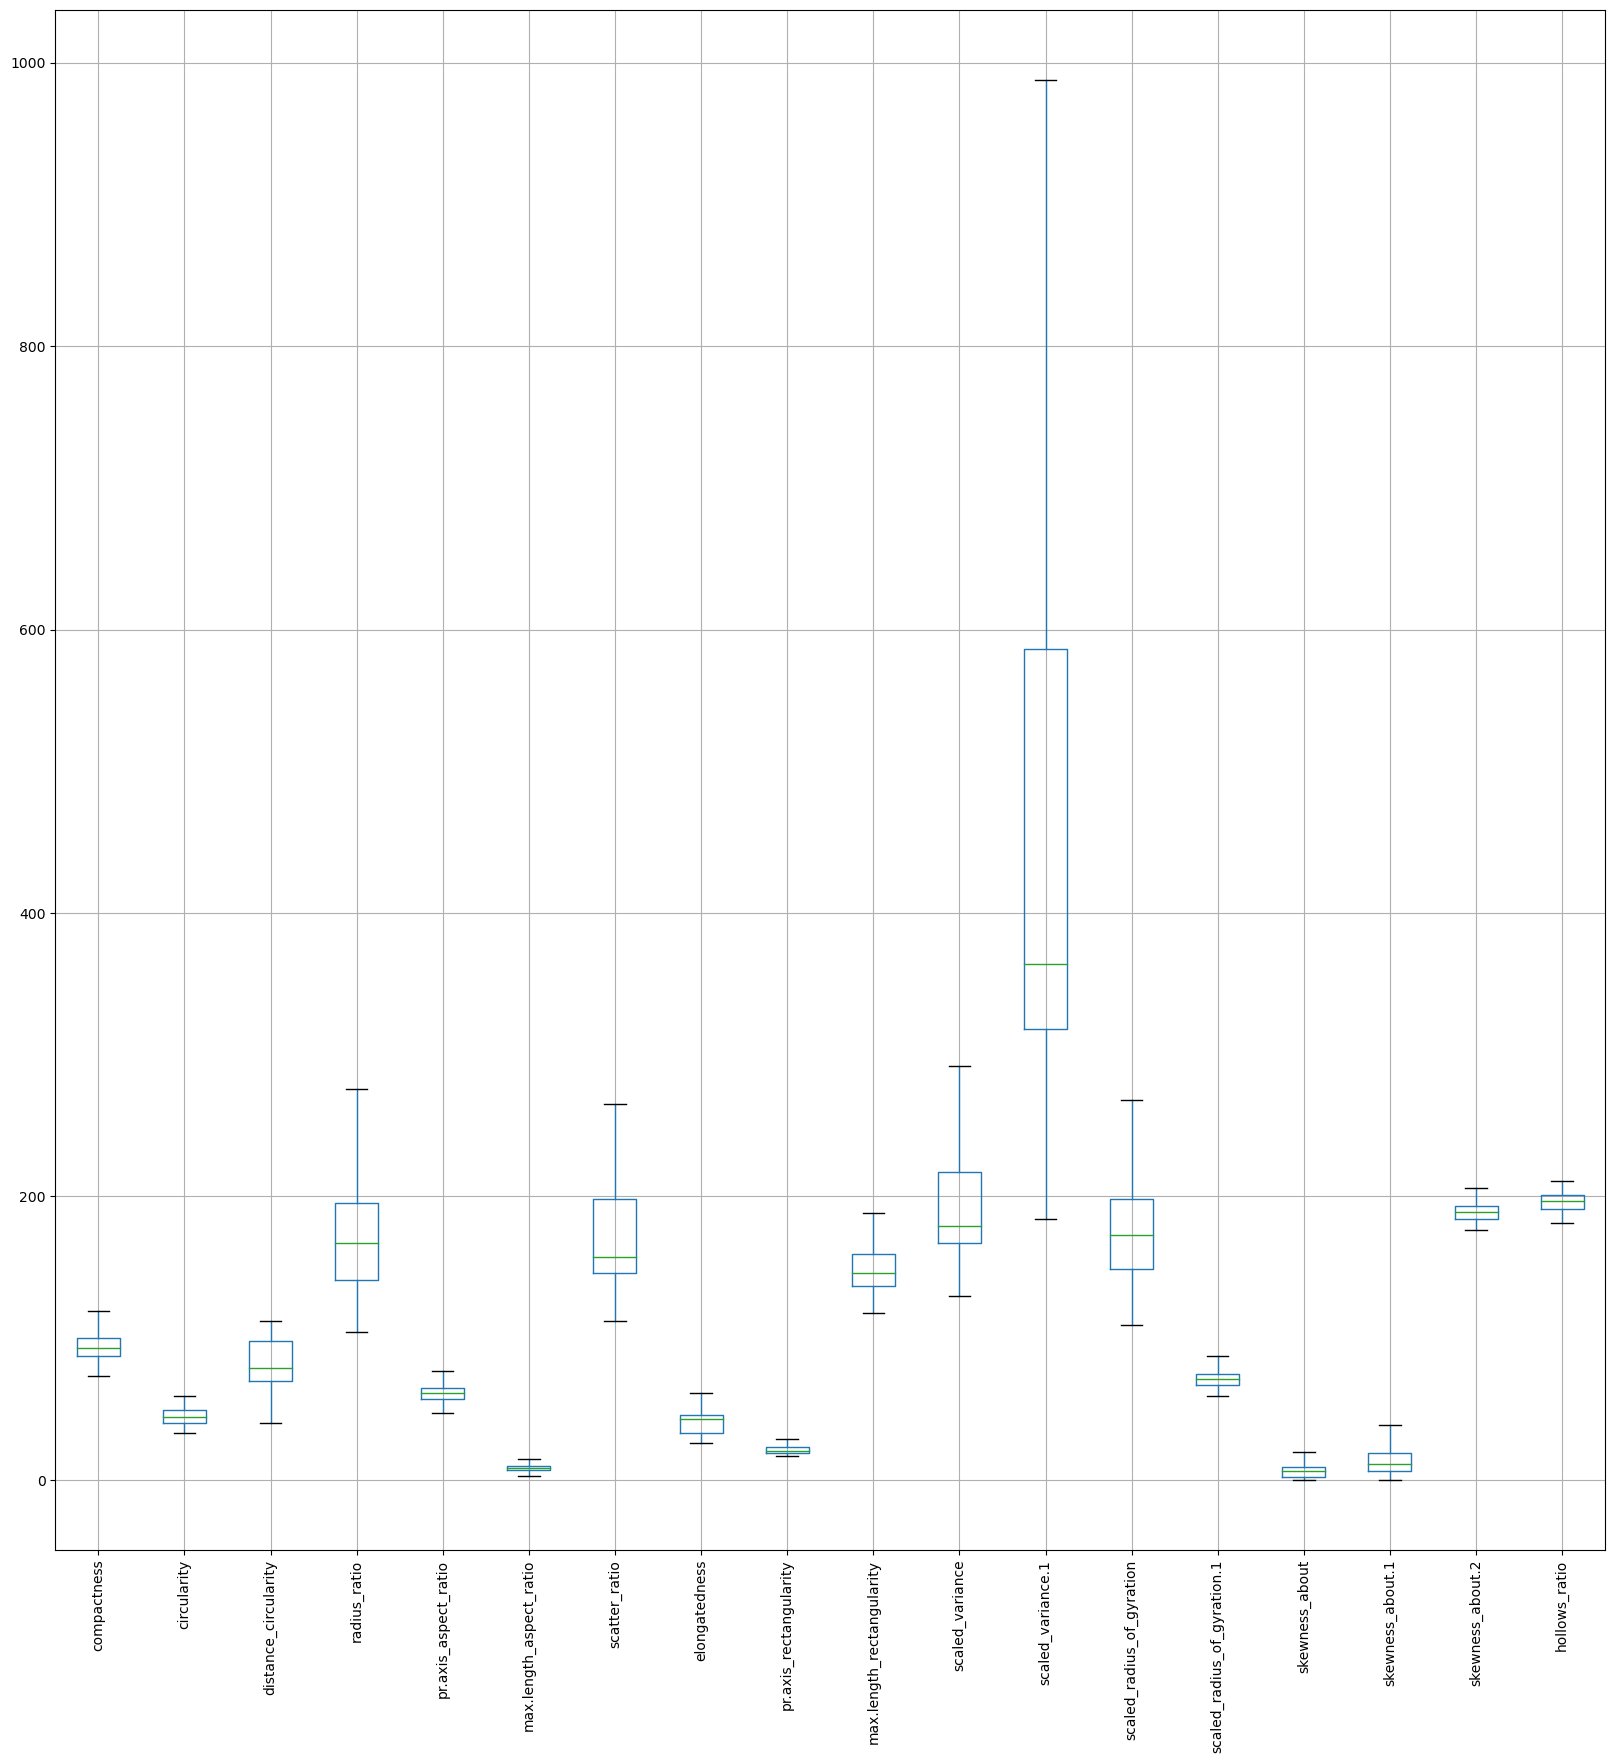

In [19]:
df_veh.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

Drop the null values

In [20]:
df_veh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
x= df_veh.drop('class',1)
y=df_veh['class']

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,
                                            y,
                                            test_size=0.2,
                                            random_state=123)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Building a Decision Tree with its original data without PCA

In [24]:
dt= DecisionTreeClassifier(random_state=100)
dt.fit(xtrain,ytrain)

y_pred_dt=dt.predict(xtest)

print(accuracy_score(ytest,y_pred_dt))
print(confusion_matrix(ytest,y_pred_dt))

0.901840490797546
[[72 11]
 [ 5 75]]


In [25]:
xtest.shape

(163, 18)

**We have used 18 features to build the decision tree model to get accuracy of 90% **

In [26]:
df_veh.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


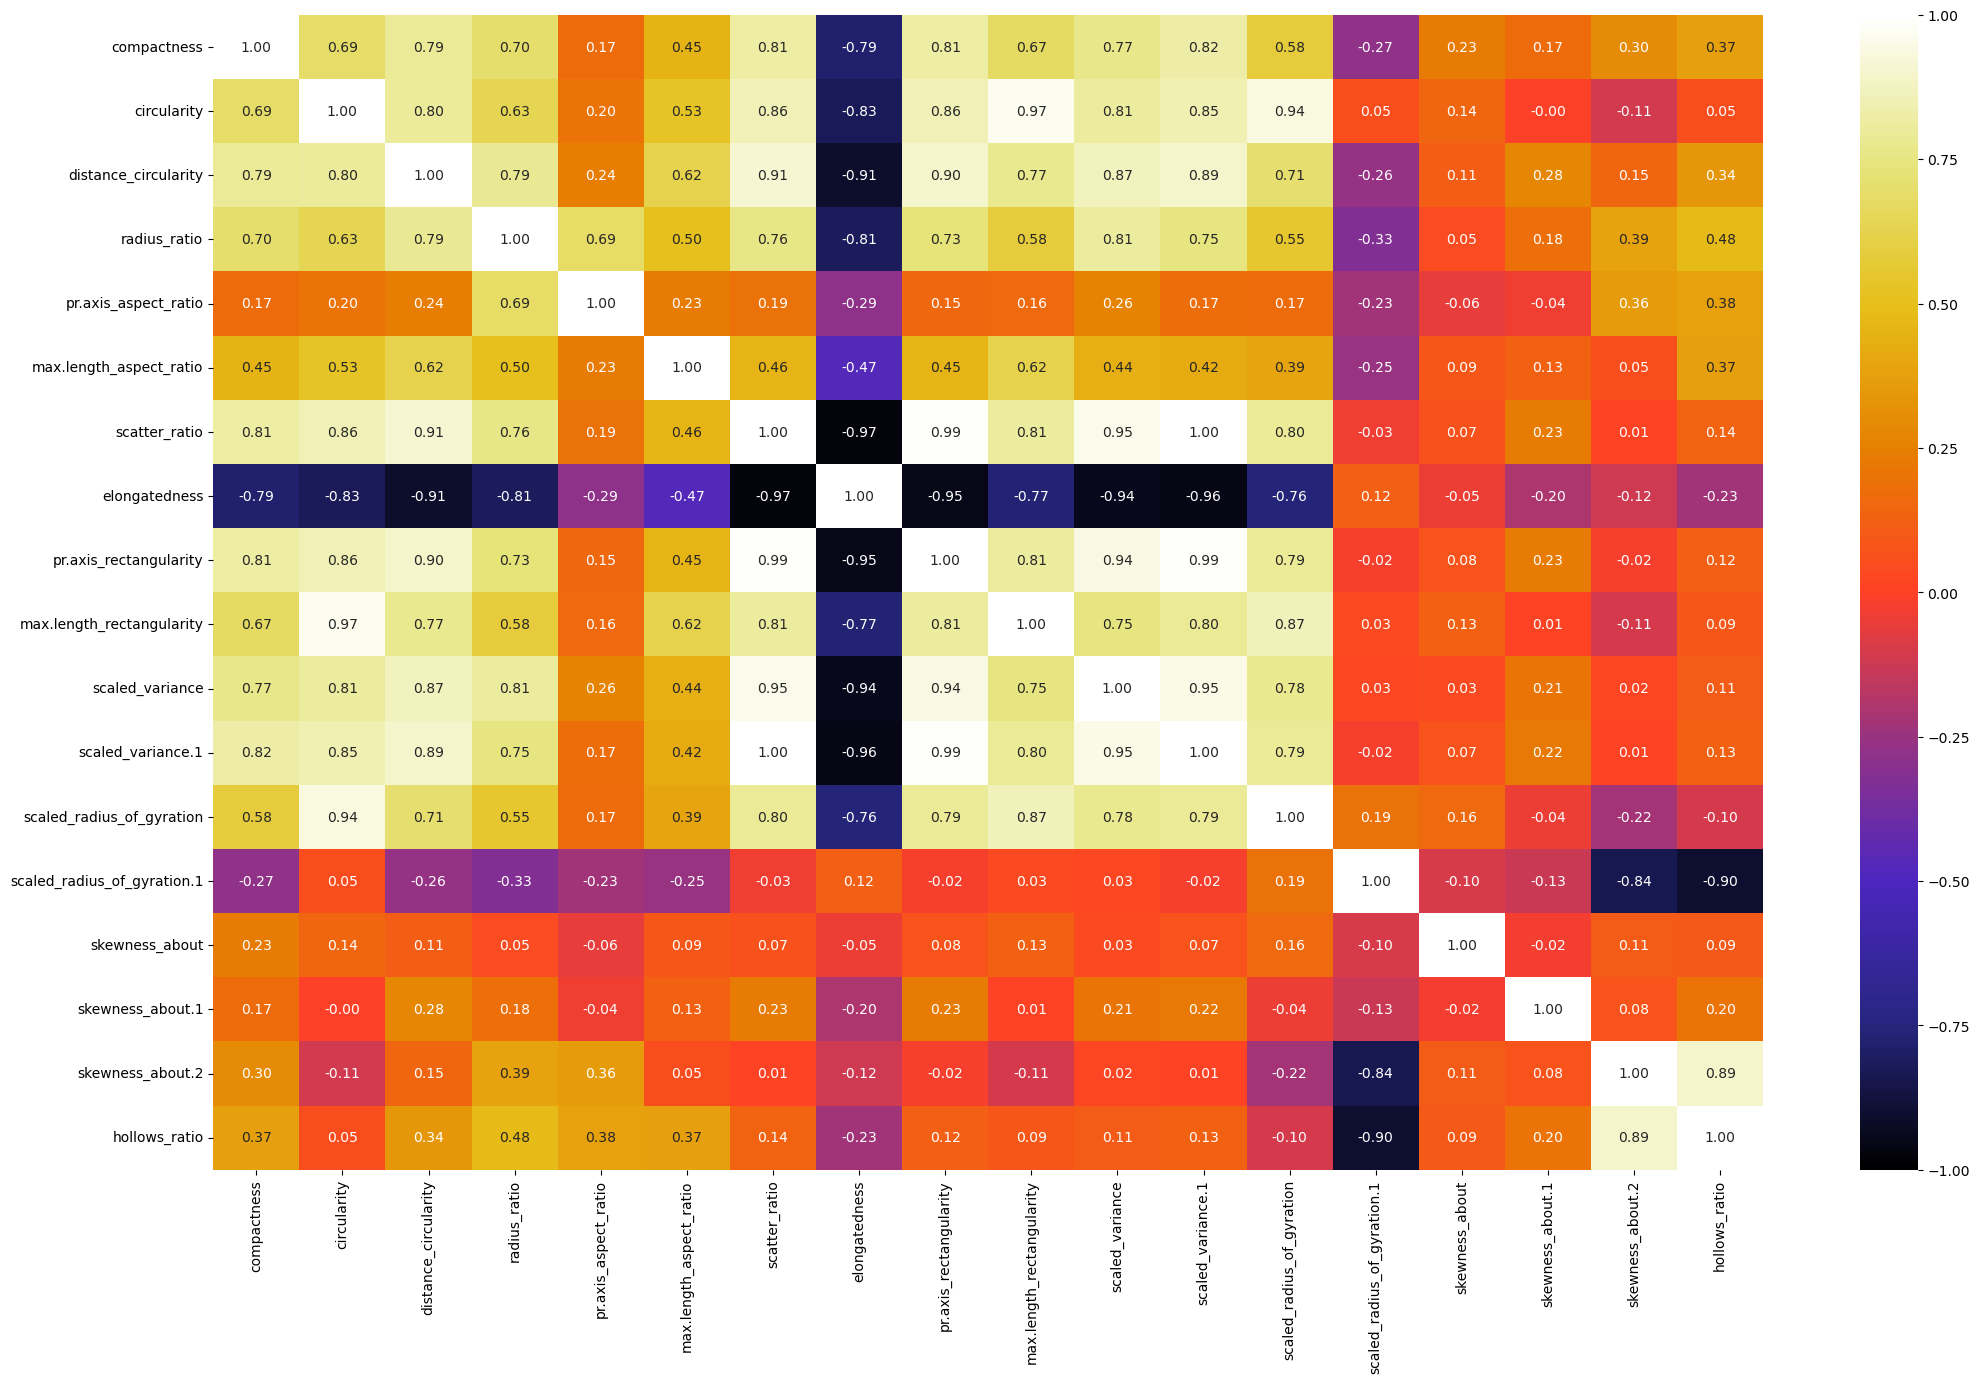

In [27]:
plt.subplots(figsize=(25,15))
sns.heatmap(df_veh.corr(), annot=True,fmt='.2f',cmap='CMRmap',vmin=-1,vmax=1)
plt.show()

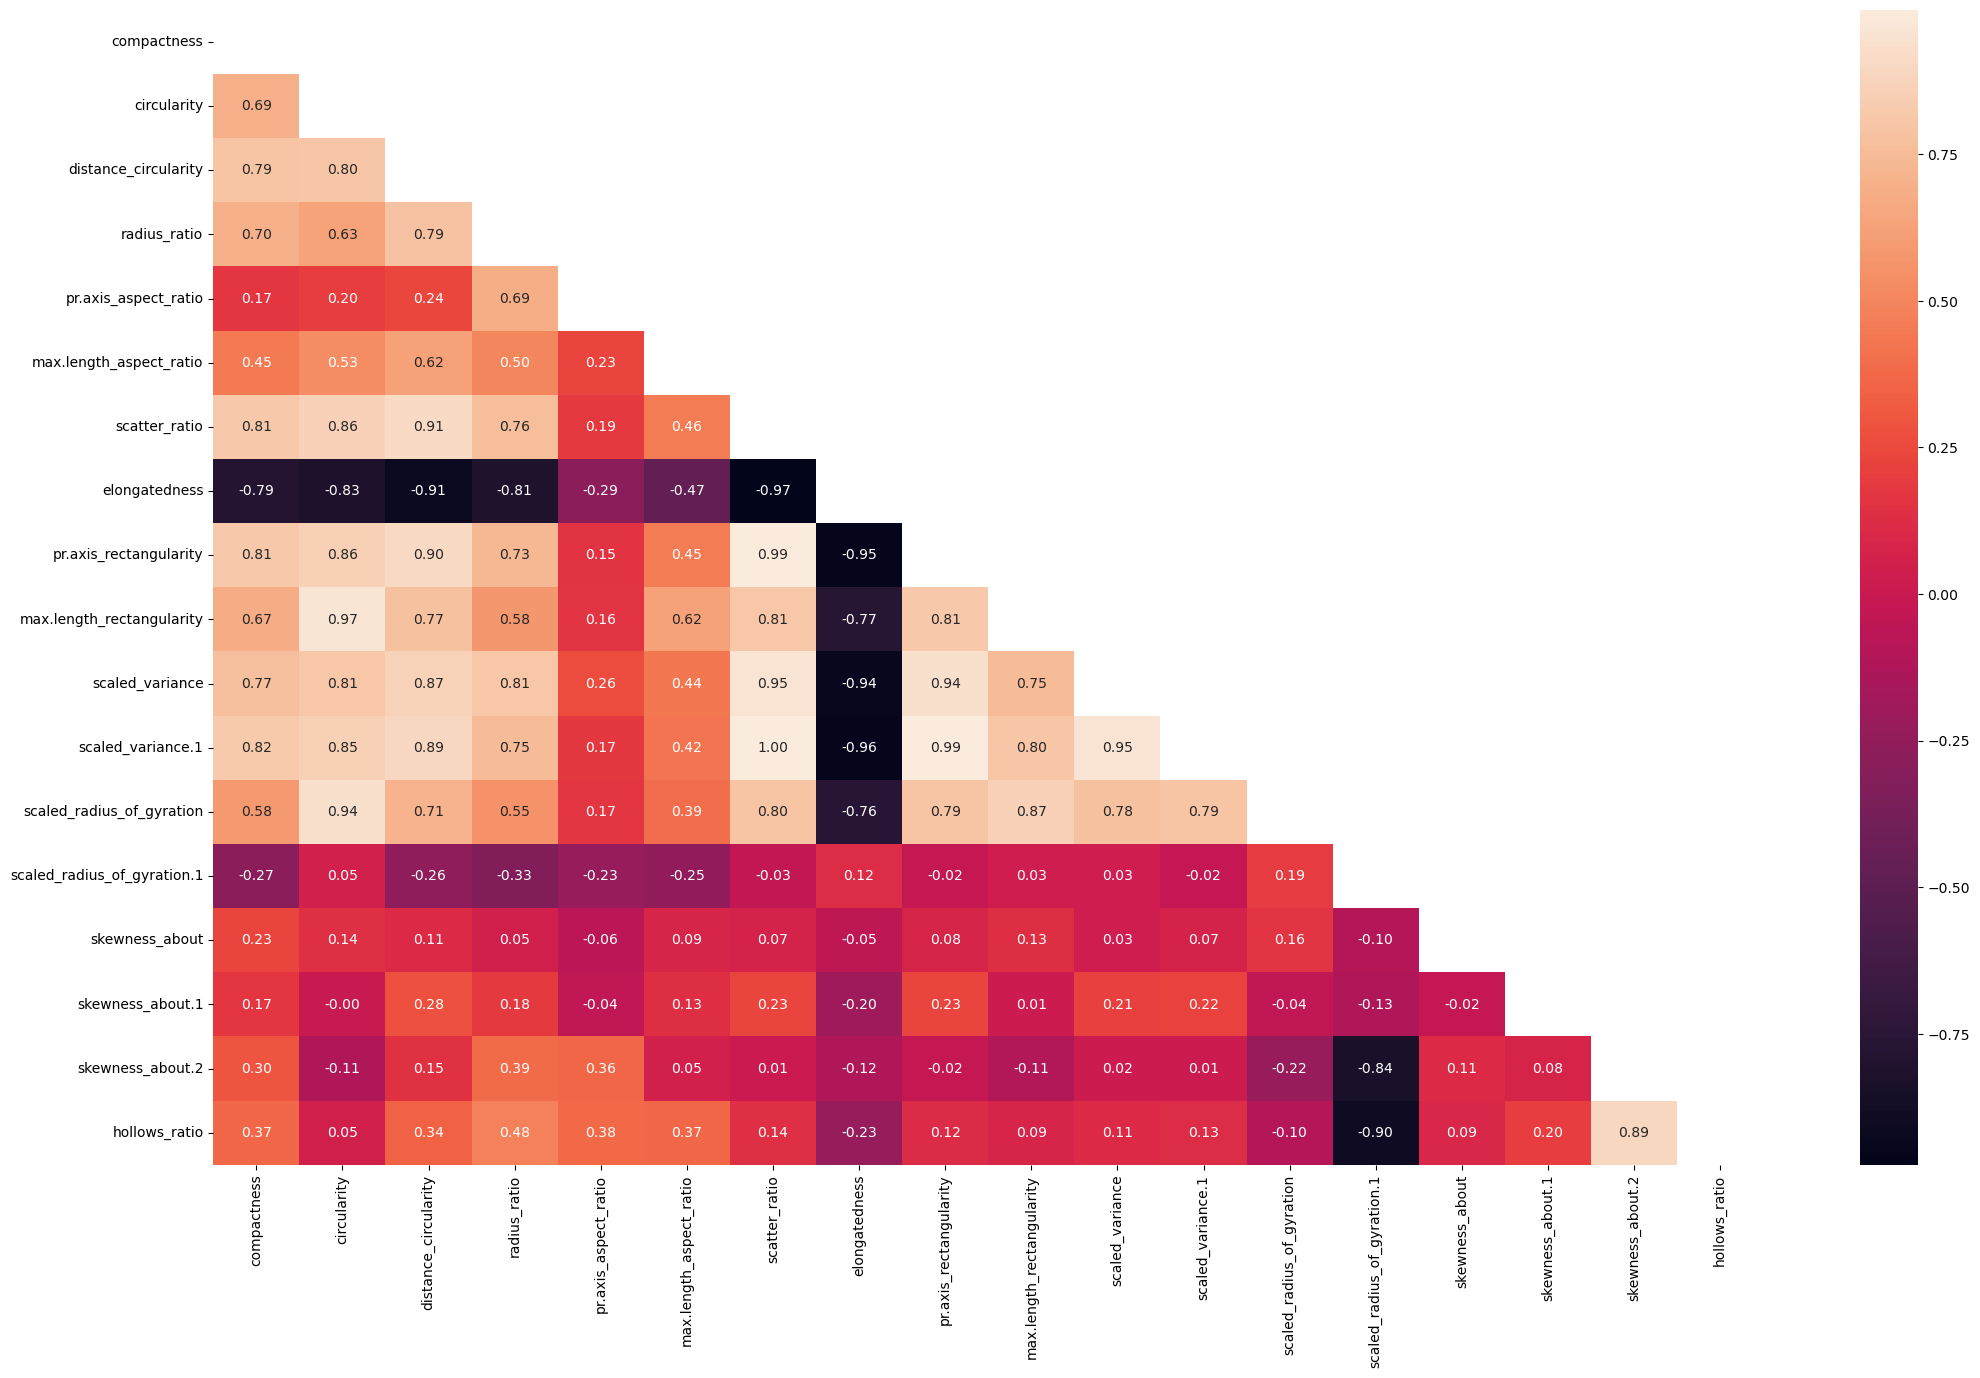

In [28]:
mask = np.triu(np.ones_like(df_veh.corr(), dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_veh.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

# Building a Decision Tree with PCA

In [29]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_sc =sc.fit_transform(x)

x_sc=pd.DataFrame(x_sc,columns=x.columns)
x_sc.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.275095,1.814935,0.801865,-0.198517,0.129648,-0.217151,0.766312,-0.397957,-0.339039,0.301676,-0.336861,-0.067703,0.372602,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.847718,-0.750630,0.351180,-0.591720,0.514333,-0.606014,-0.337462,-0.591403,-0.619031,-0.502972,-0.025824,0.550749,0.148005,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.215831,0.788709,0.801865,1.162569,-1.152637,0.949438,0.697326,1.117373,1.123780,1.415804,0.129694,1.581501,-0.413488,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.301485,0.275596,0.351180,-0.742952,0.642562,-0.606014,-0.337462,-0.913814,-0.739028,-1.462359,-1.425488,-0.067703,-0.301190,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.094445,2.670123,2.829947,-0.591720,0.514333,-0.606014,-0.268476,1.697712,-0.647602,0.425468,2.306950,0.550749,-0.188891,-1.460039,-1.721531


In [30]:
x_sc.shape

(813, 18)

In [31]:
from sklearn.decomposition import PCA

**scale the data and apply pca on this data.**

In [32]:
veh_pca=PCA()
df_veh_pca = veh_pca.fit_transform(x_sc)
df_veh_pca= pd.DataFrame(df_veh_pca)
df_veh_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141,1.175281,-0.604407,-0.554142,-0.783111,-0.132147,0.012721,-0.092135,0.224153,0.035172,0.201335,0.020590,-0.034134,0.047753
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831,0.113167,0.183133,0.156906,0.150539,0.037967,-0.362703,-0.429105,-0.170902,-0.013235,0.098359,0.044965,0.027196,-0.023479
2,3.884148,0.268596,0.712210,0.978031,0.602153,0.876249,0.608117,0.329122,-0.214921,0.412475,-0.145956,-0.364940,-0.052122,0.027895,-0.050540,0.095465,0.166959,0.015004
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691,-0.552422,0.144005,-0.155548,-0.042445,-0.489198,-0.409128,-0.064832,-0.064927,0.221135,-0.032533,-0.109106,-0.113052,-0.000596
4,0.053880,1.854078,2.549616,-1.273745,-1.495840,3.593726,1.682425,-0.079624,1.308133,0.807869,0.325874,0.471145,0.456218,0.542395,0.701259,-0.264972,-0.161192,0.027127


Eigen values are explained below by the explained variance

**This is the Eigen Value**

In [33]:
veh_pca.explained_variance_

array([9.75592419e+00, 3.26593719e+00, 1.20041435e+00, 1.17739558e+00,
       8.54137636e-01, 7.49103421e-01, 3.46961731e-01, 2.22403000e-01,
       1.32208401e-01, 9.75160321e-02, 6.02445504e-02, 5.48653930e-02,
       3.99381171e-02, 2.67746874e-02, 1.87215832e-02, 1.29036168e-02,
       6.35471760e-03, 3.63296016e-04])

In [34]:
eig_val=veh_pca.explained_variance_ratio_.round(2)*100
eig_val   # these are the eigen values.

array([54., 18.,  7.,  7.,  5.,  4.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [35]:
cumvar= np.cumsum(veh_pca.explained_variance_ratio_)
cumvar

array([0.54132913, 0.72254691, 0.78915456, 0.85448497, 0.9018787 ,
       0.94344437, 0.96269631, 0.97503683, 0.98237271, 0.9877836 ,
       0.99112641, 0.99417073, 0.99638679, 0.99787244, 0.99891125,
       0.99962724, 0.99997984, 1.        ])

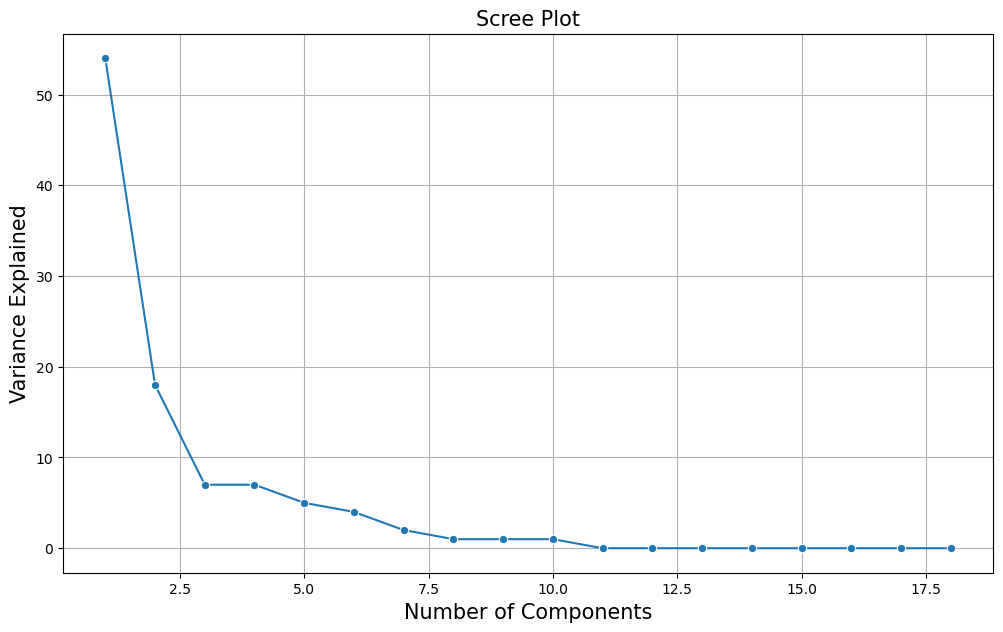

In [36]:
plt.figure(figsize=(12,7))
sns.lineplot(y=eig_val,x=range(1,len(eig_val)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

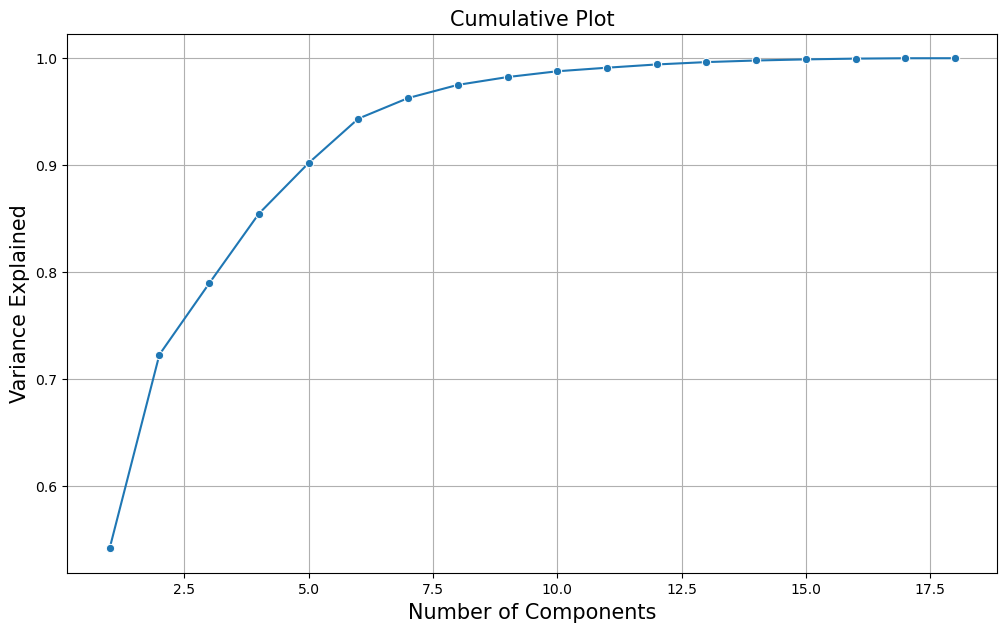

In [37]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cumvar,x=range(1,len(cumvar)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Cumulative Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **We will proceed with 4 components here. But depending on requirement 90% variation or 5 components will also do good**

In [38]:
#veh_pca=PCA(n_components=0.90)
my_pca=PCA(n_components=5)
pca_n=my_pca.fit_transform(x_sc)

In [39]:
pca_n.shape

(813, 5)

In [40]:
pca_n

array([[ 0.55690765, -0.54251542,  1.12911537, -0.40344906, -0.96314136],
       [-1.51767247, -0.37416824, -0.58222089,  0.92966019, -0.6418314 ],
       [ 3.88414779,  0.26859609,  0.71220995,  0.97803132,  0.60215274],
       ...,
       [ 5.06749158, -0.05384067,  1.23052759, -0.43621867, -0.8467823 ],
       [-3.28174242, -1.06945722, -1.56353951, -1.16324243, -0.54293316],
       [-4.93480055,  0.39720101, -1.1666015 , -0.67250224, -0.10335546]])

# Decision Tree with PCA

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_n,
                                           y,
                                           test_size=0.2,
                                           random_state=100)

In [42]:
dt_pca=DecisionTreeClassifier(random_state=100)
dt_pca.fit(xtrain,ytrain)
y_pred_dt_pca=dt_pca.predict(xtest)

print(accuracy_score(ytest,y_pred_dt_pca))
print(confusion_matrix(ytest,y_pred_dt))

0.8466257668711656
[[44 38]
 [33 48]]


# Decision Tree using LDA Data

Data gets transformed on lower dimension by using LDA. We can use this data for Decision Tree and see if the performance of the model improves

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [44]:
lda=LDA()
lda_data=lda.fit_transform(x_sc,y)

In [45]:
lda.explained_variance_ratio_

array([1.])

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(lda_data,
                                           y,
                                           test_size=0.2,
                                           random_state=100)

In [47]:
dt_lda=DecisionTreeClassifier(random_state=100)
dt_lda.fit(xtrain,ytrain)
y_pred_dt_lda=dt_lda.predict(xtest)

print(accuracy_score(ytest,y_pred_dt_lda))
print(confusion_matrix(ytest,y_pred_dt_lda))

0.901840490797546
[[70 12]
 [ 4 77]]


The accuracy of the model has improved

LDA-Objective is to get on lower dimension. We used that data for Decision Tree

In the above case, LDA data was used by decision Tree. Performance and accuracy of the model improved

**Lets Now use LDA as a prediction model rather than Dimension reduction**

### LDA for prediction

In [48]:
lda_data= lda.fit_transform(xtrain,ytrain)
y_predict_lda= lda.predict(xtest)
print(accuracy_score(ytest,y_predict_lda))
print(confusion_matrix(ytest,y_predict_lda))

0.9693251533742331
[[78  4]
 [ 1 80]]


# Clustering

We will conider that 5 componets are used for prediction - 95% 

In [49]:
df_pcax =pd.DataFrame(pca_n)

In [50]:
df_pcax.head()

,0,1,2,3,4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [51]:
from sklearn.cluster import KMeans

You can apply KMeans on original data or PCA data. The requirement is the data should be scaled.

PCA has lesser components. Original has more components.

**PCA with 5 components**

In [52]:
err=[]
for i in range(1,20):
  km=KMeans(n_clusters=i)
  km.fit(df_pcax)
  err.append(km.inertia_)

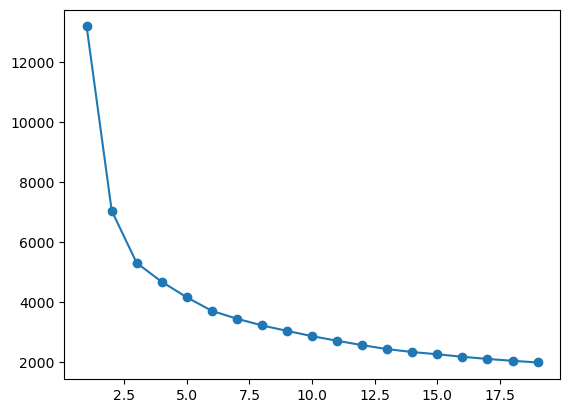

In [53]:
plt.plot(range(1,20),err,marker='o')
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
for i in range(2,20):
  km=KMeans(n_clusters=i)
  km.fit(df_pcax)
  print('Silhouette for i ', i,'cluster is',silhouette_score(df_pcax,km.labels_))

Silhouette for i  2 cluster is 0.4125234336771041
Silhouette for i  3 cluster is 0.3287654157257021
Silhouette for i  4 cluster is 0.27758656010098637
Silhouette for i  5 cluster is 0.2463812950852045
Silhouette for i  6 cluster is 0.26735028278317025
Silhouette for i  7 cluster is 0.2421736593261933
Silhouette for i  8 cluster is 0.2468980674719944
Silhouette for i  9 cluster is 0.24391109808469727
Silhouette for i  10 cluster is 0.22480341638200227
Silhouette for i  11 cluster is 0.22525681773228057
Silhouette for i  12 cluster is 0.229447481538712
Silhouette for i  13 cluster is 0.23451769934217603
Silhouette for i  14 cluster is 0.23262279101942862
Silhouette for i  15 cluster is 0.2336554917727901
Silhouette for i  16 cluster is 0.23102332607762543
Silhouette for i  17 cluster is 0.23625684592552923
Silhouette for i  18 cluster is 0.23862521484099003
Silhouette for i  19 cluster is 0.22791060372350833


In [56]:
km1=KMeans(n_clusters=2)
km1.fit(pca_n)
km1.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [57]:
my_pca.components_

array([[ 0.27146371,  0.28873877,  0.30209003,  0.26875402,  0.09940084,
         0.18735446,  0.31059127, -0.30822674,  0.30743032,  0.27758356,
         0.30119684,  0.30768884,  0.26319643, -0.04692969,  0.03952566,
         0.06312533,  0.03673543,  0.08756744],
       [-0.09109202,  0.13976157, -0.04954063, -0.18722272, -0.23135175,
        -0.09181354,  0.07013779, -0.00798776,  0.08373525,  0.12409768,
         0.07162319,  0.07509761,  0.21124117,  0.50189383, -0.03976279,
        -0.09287341, -0.51343795, -0.51400308],
       [-0.11351879,  0.16127126, -0.11246007,  0.17510458,  0.53214408,
         0.09464219, -0.108663  ,  0.04643321, -0.12674288,  0.1423553 ,
        -0.05235788, -0.11532382,  0.1857444 ,  0.06294408,  0.00258174,
        -0.72116946,  0.01786564, -0.0213105 ],
       [ 0.16145967,  0.12437562,  0.01149969, -0.2284872 , -0.39091959,
         0.13716086, -0.05356889,  0.09567491, -0.03321075,  0.16446121,
        -0.13826734, -0.05070689,  0.11060084, -0.145

In [58]:
df_pca_loading = pd.DataFrame(my_pca.components_,columns=list(x_sc))
df_pca_loading.shape

(5, 18)

In [59]:
df_pca_loading.T

,0,1,2,3,4
compactness,0.271464,-0.091092,-0.113519,0.161460,0.159996
circularity,0.288739,0.139762,0.161271,0.124376,-0.100215
distance_circularity,0.302090,-0.049541,-0.112460,0.011500,-0.105963
radius_ratio,0.268754,-0.187223,0.175105,-0.228487,0.118206
pr.axis_aspect_ratio,0.099401,-0.231352,0.532144,-0.390920,0.112277
max.length_aspect_ratio,0.187354,-0.091814,0.094642,0.137161,-0.773470
scatter_ratio,0.310591,0.070138,-0.108663,-0.053569,0.106395
elongatedness,-0.308227,-0.007988,0.046433,0.095675,-0.111923
pr.axis_rectangularity,0.307430,0.083735,-0.126743,-0.033211,0.094410
max.length_rectangularity,0.277584,0.124098,0.142355,0.164461,-0.254059


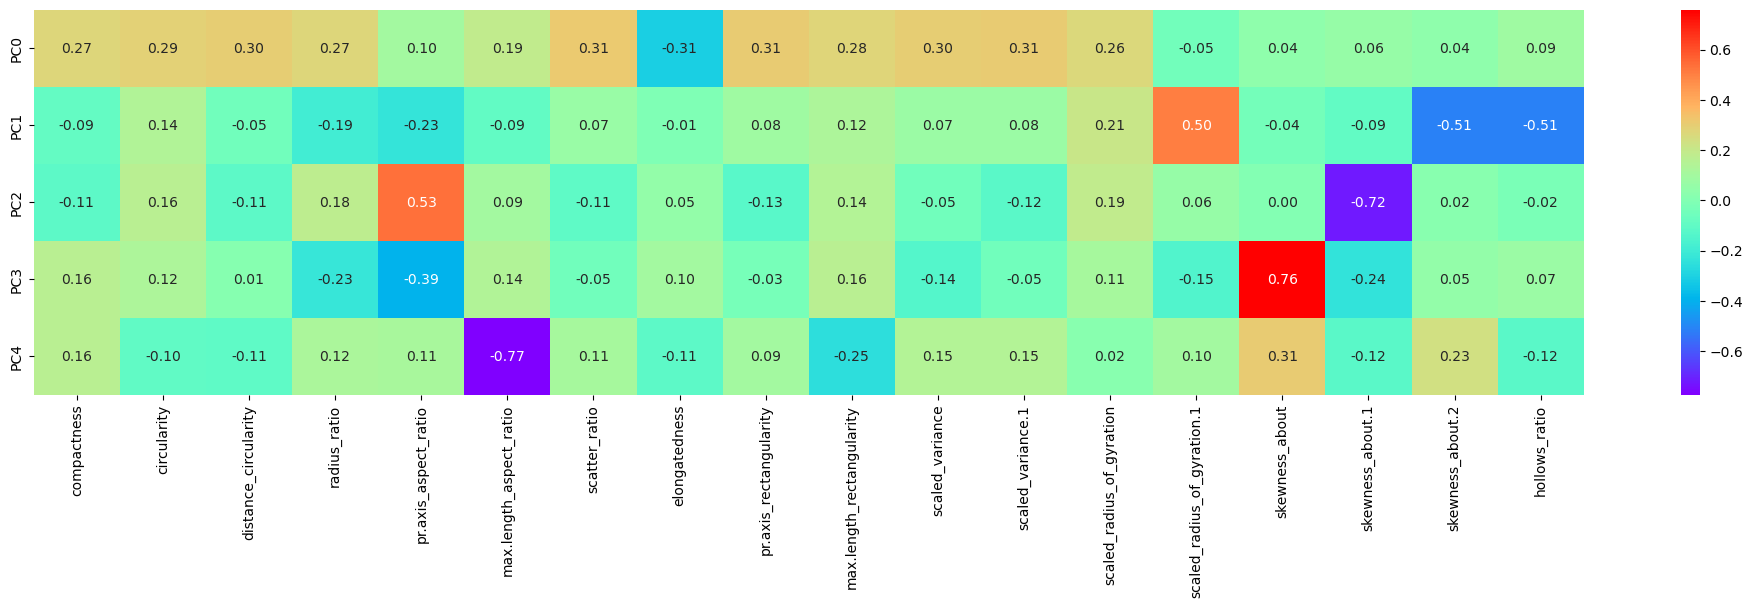

In [60]:
plt.figure(figsize=(25,5))
sns.heatmap(df_pca_loading,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4'])
plt.show()

In [61]:
df_pcax.columns=['PC0','PC1','PC2','PC3','PC4']
df_pcax.head()

,PC0,PC1,PC2,PC3,PC4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [62]:
corr = df_pcax.corr()
corr

,PC0,PC1,PC2,PC3,PC4
PC0,1.000000e+00,-8.768487e-18,1.278511e-18,-1.420043e-17,4.651227e-17
PC1,-8.768487e-18,1.000000e+00,1.702165e-17,2.928454e-18,1.239197e-17
PC2,1.278511e-18,1.702165e-17,1.000000e+00,4.612964e-16,-7.060290e-17
PC3,-1.420043e-17,2.928454e-18,4.612964e-16,1.000000e+00,-4.595742e-16
PC4,4.651227e-17,1.239197e-17,-7.060290e-17,-4.595742e-16,1.000000e+00


<Axes: >

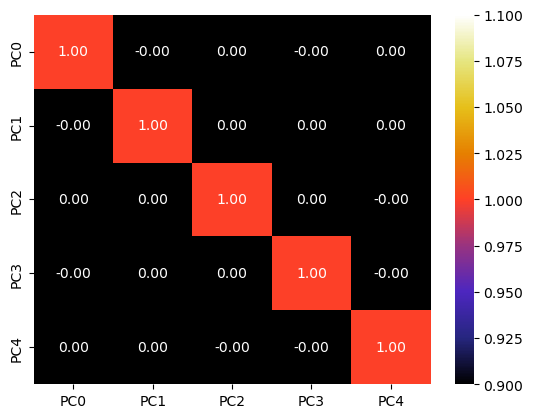

In [63]:
sns.heatmap(corr,annot=True, fmt='.2f',cmap='CMRmap',vmin=1,vmax=1)

**PCA Transformed Data**

In [64]:
pca_n_dtframe=pd.DataFrame(pca_n)
pca_n_dtframe.head()

,0,1,2,3,4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [65]:
pca_n_dtframe.columns=['PC0','PC1','PC2','PC3','PC4']
pca_n_dtframe.head()

,PC0,PC1,PC2,PC3,PC4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


1. Here the labels are the clustering that the model has done. This is not the original labels.
2. We can build a decision tree on this target label. And then compare the scores.

In [66]:
pca_n_dtframe['Labels']=km1.labels_
pca_n_dtframe.head()

,PC0,PC1,PC2,PC3,PC4,Labels
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141,1
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831,1
2,3.884148,0.268596,0.712210,0.978031,0.602153,0
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691,1
4,0.053880,1.854078,2.549616,-1.273745,-1.495840,1


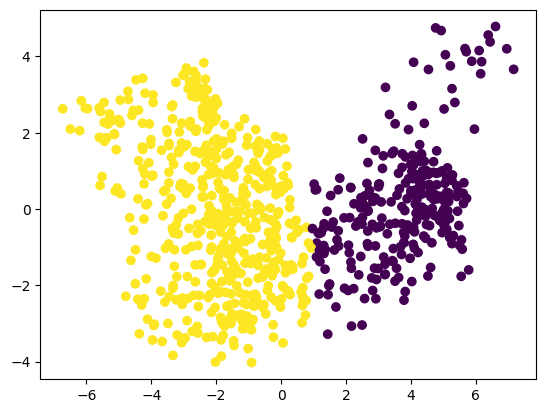

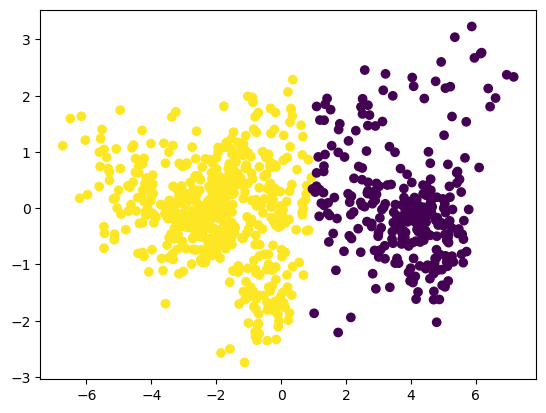

In [67]:
# plt.figure(figsize=(5,5))
# plt.subplot(1,3,1)
plt.scatter(pca_n_dtframe['PC0'],pca_n_dtframe['PC1'],c=pca_n_dtframe['Labels'])

plt.show()
# plt.subplot(1,2,1)
plt.scatter(pca_n_dtframe['PC0'],pca_n_dtframe['PC4'],c=pca_n_dtframe['Labels'])
plt.show()